# STAT 201 Project Proposal
# Music & Mental Health: How does it affect us? 
## Pragya Singhal, Jason Ji, Sai Pusuluri, Dedoria Wang

## Introduction

Music has long been known to improve mental health and various clinical and non-clinical investigations have concluded the positive affect of music engagement on a better quality of life. This also includes reduced levels of depression and anxiety. Different music genres have been known to have a strong link with cognitive benefits and various personality traits. In particular, different kinds of music genre are known to have different kinds of effects on the human mind. While many studies exist with respect to music genres and mental health, there is limited understanding regarding the direct and indirect effect of the same on traits such as depression, anxiety and insomnia.  

A research article by the National Library of Medicine identified four different types of genres (grunge rock, classical, New Age, and designer), and found significant increases in levels of sadness, relaxation, mental clarity and more among people who listen to the same for more than 15 minutes. Inspired by this study, we want to use two music genres given in our **Music and Mental Health** dataset: **Rock and Pop**, and carry out a statistical inference about any significant difference in their effects on three factors: **anxiety, depression, insomnia**. 

----------------------------

### We aim to answer this inferential question:

> Does the impact of *rock* and *pop* music on feelings of anxiety, sadness, and insomnia *differ* significantly?

### Dataset

#### Background

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. We will use the **MxMH dataset** which was managed by [@catherinerasgaitis] and downloaded from Kaggle. This dataset is the result of a simple random sampling survey. All respondents answer generic questions focused on musical background and listening habits. 

**These respondents rank anxiety, depression and insomnia on a scale of 0 to 10, where:** 

0 represents: **I do not experience this.**

10 represents: **I experience this regularly, constantly/or to an extreme.**


#### We want to use two parameters: 

Location Parameter: Mean

Scale Parameter: Standard Deviation

## Preliminary Results

### Loading the Library

In [36]:
# Loading the Library
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)
library(dplyr)

### Reading Data 

In [37]:
# Reading data by using read_csv.
mxmh_survey_results <- read_csv("https://raw.githubusercontent.com/SaiUbc/STAT-201-Group-Project-Team-3/Jason/mxmh_survey_results.csv")
# Preview the data.
head(mxmh_survey_results)

Rows: 736 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): Timestamp, Primary streaming service, While working, Instrumentali...
dbl  (7): Age, Hours per day, BPM, Anxiety, Depression, Insomnia, OCD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,⋯,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,NA,I understand.
8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,NA,I understand.
8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.


### Wrangling Data

In [38]:
# Firstly, we need to rename the column "Fav genre" to "genre" because it contains a space.
# Secondly, we want to rename three columns representing the levels of feeling to be lowercased for consistency.
# Lastly, we want to filter out rows containing NA values for each of the columns (genre, anxiety, 
# depression, and insomnia).
mxmh_survey_results <- mxmh_survey_results %>%
                       rename(genre="Fav genre",
                              anxiety=Anxiety,
                              depression=Depression,
                              insomnia=Insomnia) %>%
                       filter(!is.na(genre)) %>%    
                       filter(!is.na(anxiety)) %>%
                       filter(!is.na(depression)) %>%
                       filter(!is.na(insomnia))

head(mxmh_survey_results)

Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,genre,Exploratory,Foreign languages,⋯,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],anxiety,depression,insomnia,OCD,Music effects,Permissions
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,NA,I understand.
8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,NA,I understand.
8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.


In [39]:
# Counting the number of individuals in each genre of music.
all_of_fav_genre <- mxmh_survey_results %>%
                    group_by(genre) %>%
                    summarise(n())
all_of_fav_genre

genre,n()
<chr>,<int>
Classical,53
Country,25
EDM,37
Folk,30
Gospel,6
Hip hop,35
Jazz,20
K pop,26
Latin,3


**Because we want to use a sample that contains enough data. We want to choose the music genre: "Rock" and "Pop", which contains 188 and 114 individuals respectively. Two sample sizes are greater than 30. Also, because both samples are collected randomly, two samples is representtaive and unbiased.**

In [40]:
# We select three columns of level of feeling and the column "genre"
mxmh_survey_results_filtered <- mxmh_survey_results %>%
                                select(genre, anxiety, depression, insomnia)
head(mxmh_survey_results_filtered)

genre,anxiety,depression,insomnia
<chr>,<dbl>,<dbl>,<dbl>
Latin,3,0,1
Rock,7,2,2
Video game music,7,7,10
Jazz,9,7,3
R&B,7,2,5
Jazz,8,8,7


In [41]:
# filtering data for the music genre "rock".
rock <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock")
rock_anxi <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock") %>%
             select(anxiety)
rock_depr <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock") %>%
             select(depression)
rock_inso <- mxmh_survey_results_filtered %>%
             filter(genre=="Rock") %>%
             select(insomnia)

head(rock)


# filtering data for the music genre "pop".
pop <- mxmh_survey_results_filtered %>%
             filter(genre=="Pop")
pop_anxi <- mxmh_survey_results_filtered %>%
             filter(genre=="Pop") %>%
             select(anxiety)
pop_depr <- mxmh_survey_results_filtered %>%
             filter(genre=="Pop") %>%
             select(depression)
pop_inso <- mxmh_survey_results_filtered %>%
             filter(genre=="Pop") %>%
             select(insomnia)

head(pop)

genre,anxiety,depression,insomnia
<chr>,<dbl>,<dbl>,<dbl>
Rock,7,2,2
Rock,2,0,0
Rock,10,6,8
Rock,8,6,10
Rock,7,7,2
Rock,5,6,6


genre,anxiety,depression,insomnia
<chr>,<dbl>,<dbl>,<dbl>
Pop,7,5,4
Pop,3,3,8
Pop,7,4,2
Pop,3,2,1
Pop,6,6,4
Pop,8,2,1


In [42]:
# Calculating the mean of the sample of rock music for each type of emotions.
rock_anxi_mean <- rock %>%
                  select(anxiety) %>%
                  summarise(anxi_mean = mean(anxiety)) %>%
                  as.numeric()

rock_depr_mean <- rock %>%
                  select(depression) %>%
                  summarise(depr_mean = mean(depression)) %>%
                  as.numeric()

rock_inso_mean <- rock %>%
                  select(insomnia) %>%
                  summarise(depr_mean = mean(insomnia)) %>%
                  as.numeric()


# Calculating the mean of this sample of pop music for each type of emotions.
pop_anxi_mean <- pop %>%
                  select(anxiety) %>%
                  summarise(anxi_mean = mean(anxiety)) %>%
                  as.numeric()

pop_depr_mean <- pop %>%
                  select(depression) %>%
                  summarise(depr_mean = mean(depression)) %>%
                  as.numeric()

pop_inso_mean <- pop %>%
                  select(insomnia) %>%
                  summarise(depr_mean = mean(insomnia)) %>%
                  as.numeric()


tibble(rock_anxi_mean, rock_depr_mean, rock_inso_mean)  # tibble of three means of rock genre

tibble(pop_anxi_mean, pop_depr_mean, pop_inso_mean)     # tibble of three means of pop genre

rock_anxi_mean,rock_depr_mean,rock_inso_mean
<dbl>,<dbl>,<dbl>
6.12234,5.236702,3.880319


pop_anxi_mean,pop_depr_mean,pop_inso_mean
<dbl>,<dbl>,<dbl>
6.074561,4.486842,3.368421


In [43]:
# Visualizing the Sample's distribution of the genre "Rock"
options(repr.plot.width = 5, repr.plot.height = 4) # setting dimensions

rock_anxi_sample <- rock_anxi %>%
               ggplot() +
               geom_histogram(aes(x=anxiety), binwidth=1) +
               geom_vline(xintercept=rock_anxi_mean, colour="red", size=1) +
               xlab("level of anxiety") +
               ylab("density") +
               ggtitle("Rock-Anxi") +
               theme(text = element_text(size=15)) 
               
rock_depr_sample <- rock_depr %>%
               ggplot() +
               geom_histogram(aes(x=depression), binwidth=1) +
               geom_vline(xintercept=rock_depr_mean, colour="red", size=1) +
               xlab("level of depression") +
               ylab("density") +
               ggtitle("Rock-Depr") +
               theme(text = element_text(size=15))
rock_inso_sample <- rock_inso %>%
               ggplot() +
               geom_histogram(aes(x=insomnia), binwidth=1) +
               geom_vline(xintercept=rock_inso_mean, colour="red", size=1) +
               xlab("level of insomnia") +
               ylab("density") +
               ggtitle("Rock-Inso") +
               theme(text = element_text(size=15))


# Visualizing the Sample's distribution of the genre "Pop".
options(repr.plot.width = 5, repr.plot.height = 5) # setting dimensions

pop_anxi_sample <- pop_anxi %>%
               ggplot() +
               geom_histogram(aes(x=anxiety), binwidth=1) +
               geom_vline(xintercept=rock_anxi_mean, colour="red", size=1) +
               xlab("level of anxiety") +
               ylab("density") +
               ggtitle("Pop-Anxi") +
               theme(text = element_text(size=15)) 
               
pop_depr_sample <- pop_depr %>%
               ggplot() +
               geom_histogram(aes(x=depression), binwidth=1) +
               geom_vline(xintercept=rock_depr_mean, colour="red", size=1) +
               xlab("level of depression") +
               ylab("density") +
               ggtitle("Pop-Depr") +
               theme(text = element_text(size=15))
pop_inso_sample <- pop_inso %>%
               ggplot() +
               geom_histogram(aes(x=insomnia), binwidth=1) +
               geom_vline(xintercept=rock_inso_mean, colour="red", size=1) +
               xlab("level of insomnia") +
               ylab("density") +
               ggtitle("Pop-Inso") +
               theme(text = element_text(size=15))


#### Comparing level of Anxiety

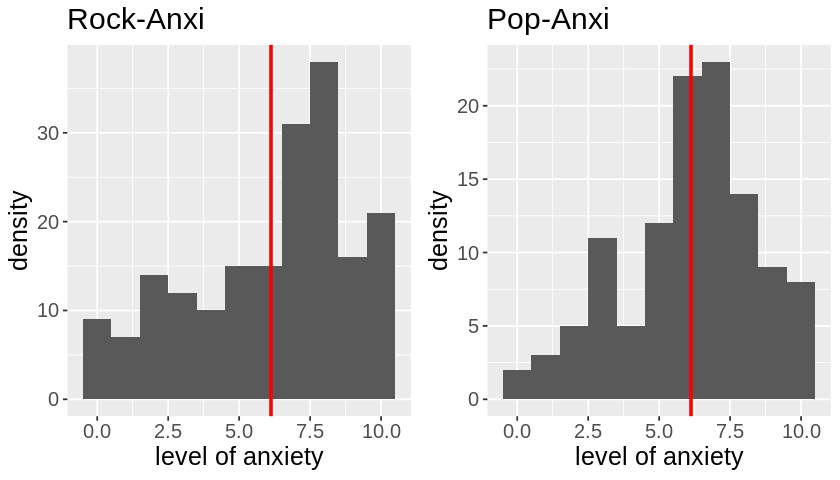

In [44]:
# Compare the influence of two different genre of music on Anxiety
options(repr.plot.width = 7, repr.plot.height = 4)
plot_grid(rock_anxi_sample,
          pop_anxi_sample,
          ncol=2)

**Note: Two plots have a similar shape and range. Also, the mean of the two samples are close.**

#### Comparing level of Depression

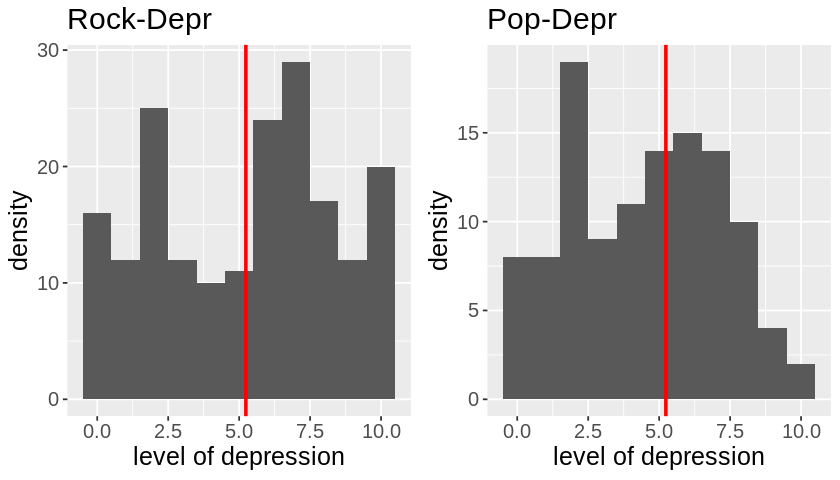

In [45]:
# Compare the influence of two different genre of music on Depression
options(repr.plot.width = 7, repr.plot.height = 4)
plot_grid(rock_depr_sample,
          pop_depr_sample,
          ncol=2)

**Note: Two plots have a similar shape and range. Also, the mean of the two sampls are close.(We suppose that the second plot is bi-model).**

#### Comparing level of Insomnia

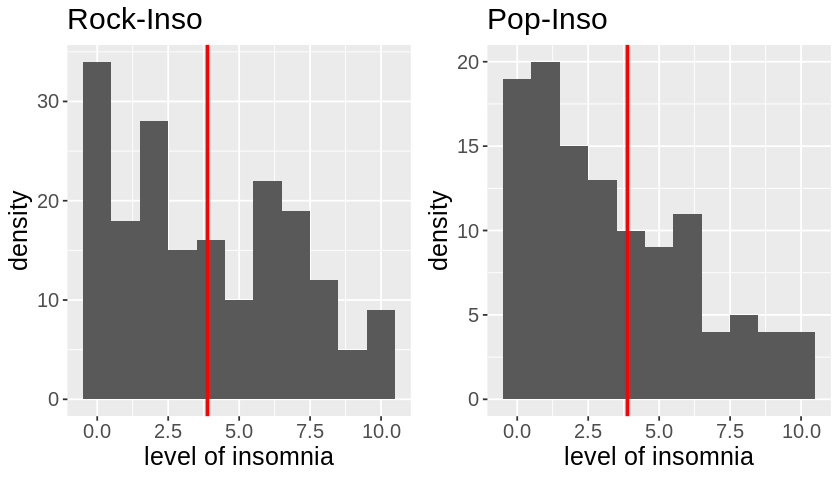

In [46]:
# Compare the influence of two different genre of music on Insomnia
options(repr.plot.width = 7, repr.plot.height = 4)
plot_grid(rock_inso_sample,
          pop_inso_sample,
          ncol=2)

**Note: Two plots have a similar shape and range. Also, the mean of the two samples are close.**

### Point Estimates

In [47]:
# Comparing the mean for genre "Rock" and "Pop".
point_estimates_mean <- mxmh_survey_results_filtered %>%
                   filter(genre=="Rock" | genre=="Pop") %>%
                   group_by(genre) %>%
                   summarise(n=n(),                      # number of observations
                             anxi_mean=mean(anxiety),    # mean of level of anxiety
                             depr_mean=mean(depression), # mean of level of depression
                             inso_mean=mean(insomnia))   # mean of level of insomnia
                             
point_estimates_mean

genre,n,anxi_mean,depr_mean,inso_mean
<chr>,<int>,<dbl>,<dbl>,<dbl>
Pop,114,6.074561,4.486842,3.368421
Rock,188,6.122340,5.236702,3.880319


In [48]:
# Comparing the standard deviation for genre "Rock" and "Pop".
point_estimates_sd <- mxmh_survey_results_filtered %>%
                   filter(genre=="Rock" | genre=="Pop") %>%
                   group_by(genre) %>%
                   summarise(n=n(),                      # number of observations
                             anxi_sd=sd(anxiety),        # standard deviations of level of anxiety
                             depr_sd=sd(depression),     # standard deviations of level of depression
                             inso_sd=sd(insomnia))       # standard deviations of level of insomnia
point_estimates_sd

genre,n,anxi_sd,depr_sd,inso_sd
<chr>,<int>,<dbl>,<dbl>,<dbl>
Pop,114,2.392126,2.64279,2.860358
Rock,188,2.875478,3.14338,3.049991


### Methods: Plan

After cleaning the dataset and identifying the two types of music we want to focus on, we aim to examine their association with three emotion levels: Anxiety, Depression, and Insomnia. You can see that the shape and range of all three sets of plots are similar. However, **we cannot conclude that there is no difference between the influence of two genres of music in three different feelings because our comparison is based on only one sample, which cannot generalize to the whole population.**

To address the limitations, we will use the **bootstrap sampling to generate additional samples by resampling our data with replacement**. This approach estimates the sampling distribution without strong assumptions, providing more accurate confidence intervals, especially with smaller sample sizes or non-normal data.

**The significance level (α) is a predefined maximum probability of commuting type I error we’re willing to accept. By default, we set it to be 5%.**

Then, we will **conduct hypothesis tests with a significant level of 5% to assess the statistical differences in levels of feeling between the genre of Rock music and Pop music**. Specifically, because we don't know the population's standard deviation, we will employ the **two-sample t-test to compare the means of two groups. We will do it three times because we want to focus on the difference of the influence of two music genres in three different feelings.**. Additionally, we will **conduct a 95% confidence interval** to provide a measure of uncertainty, offering stakeholders a range of likely values for the true population parameter.

**Our hypothesis is as follows:** 

Null Hypothesis (H0): There is no discernible difference in the population mean of feeling levels affected by two different genres of music(Rock&Pop).
 
Alternative Hypothesis (H1): A significant difference exists in the population mean of feeling levels affected by two different genres of music(Rock&Pop).

 
That is:
<center>$H_0: \mu_0 = \mu_1$</center> 

<center>$H_1: \mu_0 \neq \mu_1$</center> 


where $\mu$ is the population's mean of the level of each feeling.

The formula of Test statistic we will use:
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$


### Impact & Future

The potential impact of this study is significant. If music can influence mental health issues like anxiety, depression, and insomnia, it could inform effective interventions. Employing appropriate statistical tests will offer objective evidence to support our conclusions and pave the way for new and effective approaches to address mental health challenges.

### References

1. McCraty R, Barrios-Choplin B, Atkinson M, Tomasino D. The effects of different types of music on mood, tension, and mental clarity. Altern Ther Health Med. 1998 Jan;4(1):75-84. PMID: 9439023.

2. Gustavson, D.E., Coleman, P.L., Iversen, J.R. et al. Mental health and music engagement: review, framework, and guidelines for future studies. Transl Psychiatry 11, 370 (2021). https://doi.org/10.1038/s41398-021-01483-8 

3. Kaggle Dataset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results